In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Population dynamics by eigenvectors

Nice experiment to understand what an eigenvector truly is.

The two-dimensional plan represents the state of a two species population.

We give two eigenvalues $\Lambda$ with corresponding eigenvectors $P$. The difference equation can be written as $X_{n+1} = AX_{n}$, where $X$ is the vector of populations at different instants, while $A$ is the matrix that couples the species. Eigenvectors and eigenvalues tell how the population will evolve, dictating the manifold. $A=P\Lambda P^{-1}$.

In practice, $X_{n+1}=P\Lambda P^{-1}X_{n}$, that is: i) take the vector $X_n$, change its basis in the basis of $P$, ii) stretch its components in $P$ independently of a factor $\lambda_k$ in the direction $p_k$, iii) recompute the components of the new vector in the canonical base by multiplying by $P$.

Take a pair $\lambda_k$, $p_k$. The system basically evolves along $p_k$ with speed $\lambda_k$. If $\lambda_k<1$, the system proceeds backwards along the $p_k$-axis, and viceversa. This is why in the example, at the beginning the system quickly goes back in a direction similar to $p_1$. $\lambda_2$ is not that far from 1, so it kicks in slowly. But once the system is placed along $p_2$, $\lambda_1$ is not able anymore to push the system in $p_1$ direction, because the corresponding component of the state is almost null.

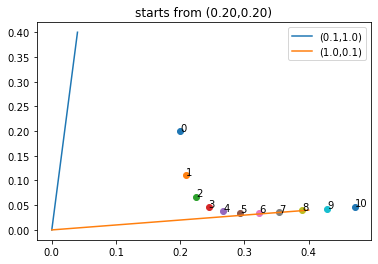

In [45]:
eigenvectors = np.array([[0.1,1],[1,0.1]])
eigenvalues  = np.array([[0.5,0],[0,1.1]])

x0 = np.array([0.2,0.2])

states = [ x0 ]
A = eigenvectors.dot(eigenvalues.dot(np.linalg.inv(eigenvectors)))

for i in range(0,10):
    states.append(A.dot(states[-1]))

j=0
for i in states:
    plt.scatter(i[0],i[1])
    plt.annotate(j, (i[0], i[1]))
    j += 1
plt.plot([0,0.4*eigenvectors[0][0]],[0,0.4*eigenvectors[0][1]],label="({},{})".format(eigenvectors[0][0],eigenvectors[0][1]))
plt.plot([0,0.4*eigenvectors[1][0]],[0,0.4*eigenvectors[1][1]],label="({},{})".format(eigenvectors[1][0],eigenvectors[1][1]))
plt.legend()
plt.title("starts from ({:.2f},{:.2f})".format(x0[0],x0[1]))
plt.show()